In [78]:
from sklearn.datasets import load_breast_cancer

In [79]:
import pandas as pd

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

In [92]:
d = load_breast_cancer()

df = pd.DataFrame(d['data'],columns=d['feature_names']).iloc[:,0:6]


In [93]:
plt.rc('font', size=12) 
plt.rcParams['figure.figsize'] = [10, 10]

In [94]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
0,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,11.42,20.38,77.58,386.1,0.14250,0.28390
4,20.29,14.34,135.10,1297.0,0.10030,0.13280
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590
565,20.13,28.25,131.20,1261.0,0.09780,0.10340
566,16.60,28.08,108.30,858.1,0.08455,0.10230
567,20.60,29.33,140.10,1265.0,0.11780,0.27700


In [95]:
X_train, X_test, y_train, y_test = train_test_split(df, d['target'], test_size=0.33, random_state=42)

# Without power transformation

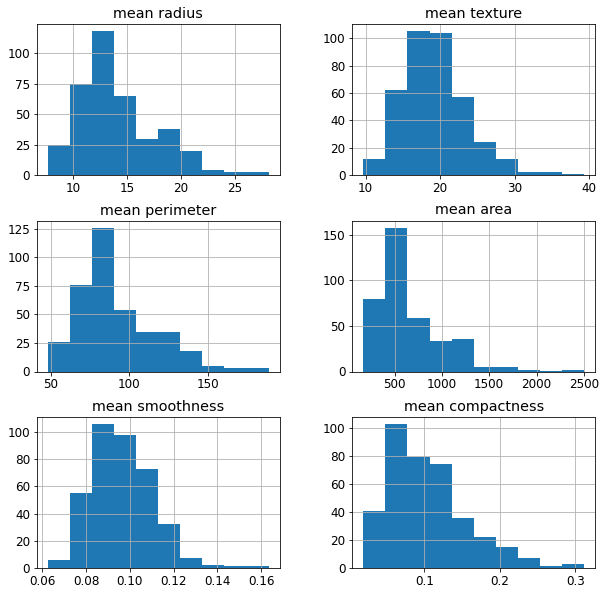

In [96]:
X_train.hist()

plt.show()

In [97]:
model = Pipeline([
                  ('scaler',StandardScaler()),
                  ('model',KNeighborsClassifier())
])

model.fit(X_train,y_train)

roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.9764401134821759

# With power transformation

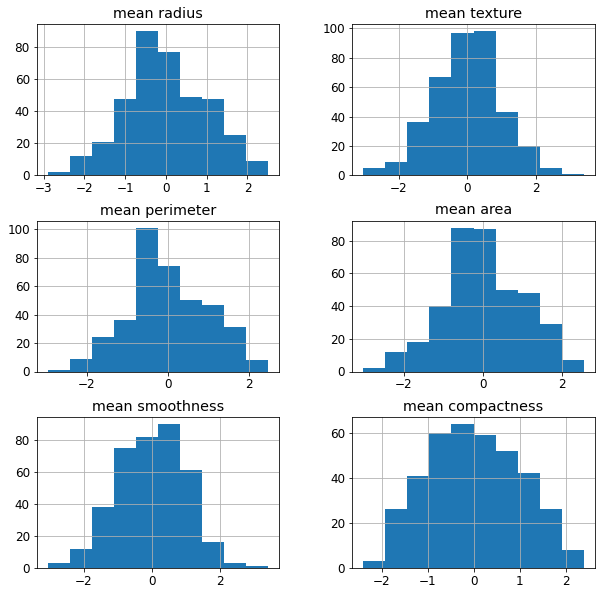

In [98]:
pd.DataFrame(PowerTransformer().fit_transform(X_train),columns=X_train.columns).hist()


plt.show()

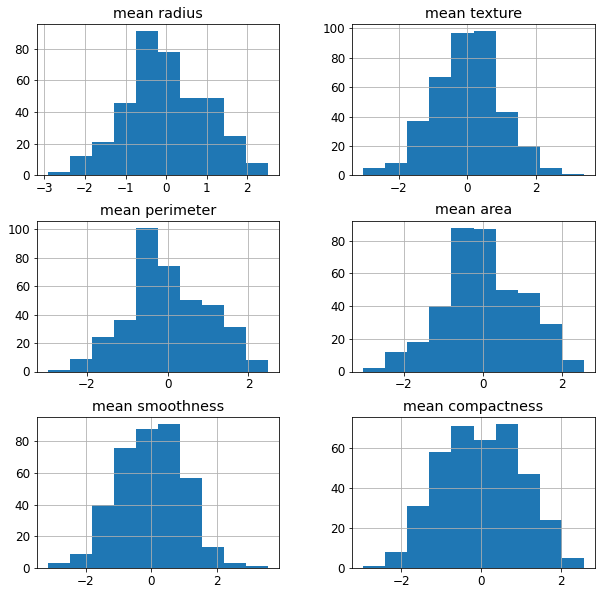

In [99]:
pd.DataFrame(PowerTransformer(method='box-cox').fit_transform(X_train),columns=X_train.columns).hist()


plt.show()

In [100]:
model = Pipeline([
                  ('power',PowerTransformer()),
                  ('scaler',StandardScaler()),
                  ('model',KNeighborsClassifier())
])

model.fit(X_train,y_train)

roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.9862464536820031